# Buff size 
Trying to understand why you ned the `*2` in the call to `fp.read` in my remote_load version of bas-apres (https://github.com/antarctica/bas-apres/pull/2#discussion_r1956170239).

In [2]:
%reload_ext autoreload
import sys
sys.path.append("../../../xapres")
import xapres as xa
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
unattended_FG   = '/Users/jkingslake/Documents/projects/current_projects/AntPen_NSF_NERC/AntPen_NSF_NERC/data/flask/ApRES Season1/7.12.2024_Site2_unattended/Data/DATA2024-12-09-0258.DAT'
edited_FG   = '/Users/jkingslake/Documents/projects/current_projects/AntPen_NSF_NERC/AntPen_NSF_NERC/data/flask/ApRES Season1/7.12.2024_Site2_unattended/Data/edited.DAT'
attended_FG = '/Users/jkingslake/Documents/projects/current_projects/AntPen_NSF_NERC/AntPen_NSF_NERC/data/flask/ApRES Season1/7.12.2024_Site2_attended/Data/Survey_2024-12-07_185459_site2HH.dat'
multi_burst_TG = '/Users/jkingslake/Documents/science/ApRES/xapres/data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
sameAsMatlab_TG = '/Users/jkingslake/Documents/science/ApRES/xapres/data/sample/thwaites/DATA2023-02-12-0437.DAT'
baseCampTests_FG = '/Users/jkingslake/Documents/projects/current_projects/AntPen_NSF_NERC/AntPen_NSF_NERC/data/flask/ApRES Season1/3.12.2024_Base_camp_tests/Raw_Data/Survey_2024-12-03_144553_207_basecamp_HH.dat'


The cell below shows the issue. Even though count is 160000 it only loads 80000 elements. 

In [3]:
path = baseCampTests_FG

fp = open(path, "rb")    
count = 160000  
inbuff = fp.read(count)
np.frombuffer(inbuff, dtype=np.dtype('<u2')).shape

(80000,)

In [9]:
np.frombuffer(b'\x01\x02\x03\x04\x05\x06\x07\x08', dtype=np.uint16, count=4)

array([ 513, 1027, 1541, 2055], dtype=uint16)

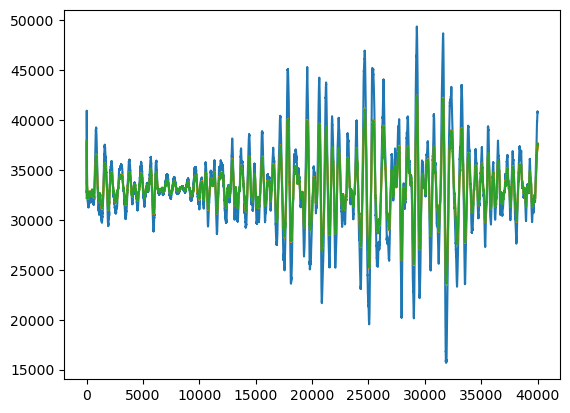

In [6]:
path = baseCampTests_FG
fp = open(path, 'r', encoding='latin-1')
file_size = os.fstat(fp.fileno()).st_size
header_start = fp.tell()
header_start

#while not fp.tell() >= file_size:


count = int(np.prod((20,40000,2)))
fp.seek(1316, 0)
burst_flat_FG = np.fromfile(fp, dtype=np.dtype('<u2'), count=count)

burst_reshaped = burst_flat_FG.reshape((20, 2, 40000))

# playing with which chirps we plot helped to establish that this is the correct reshaping
burst_reshaped.shape
plt.plot(burst_reshaped[0,0,:])
plt.plot(burst_reshaped[0,1,:])
plt.plot(burst_reshaped[1,1,:])

In [19]:
count

1600000

In [36]:
fp = open(path, "rb")    
count = 160000  
inbuff = fp.read(count)
np.frombuffer(inbuff, dtype=np.dtype('<u2')).shape
#plt.plot(data)

(80000,)

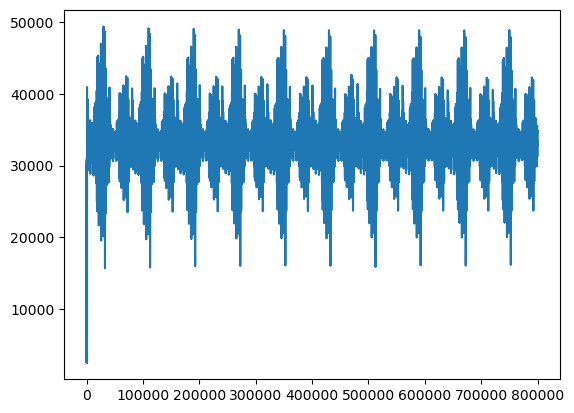

In [16]:
data = np.frombuffer(inbuff, dtype=np.uint16)
plt.plot(data)